In [28]:
import numpy as np
import sys
from astropy.io import ascii

import astropy.units as u
from astropy.nddata import StdDevUncertainty

sys.path.append('..')
from astrodb_utils.fits import add_missing_keywords, add_observation_date, add_wavelength_keywords, check_header

from astropy.io.fits import getheader
from specutils import Spectrum
from astrodb_utils.spectra import check_spectrum_plottable

In [77]:
fits_created = 0

In [71]:
link = './xshyne_data.csv'
xshyne_table = ascii.read(
    link,
    format="csv",
    data_start=1,
    header_start=0,
    guess=False,
    fast_reader=False, 
    delimiter=",",
)

In [52]:
def load_file(source):
    path = f'./xshyne_npz/{source}.npz'
    file_open = np.load(path)
    
    wave = file_open['wl']
    flux = file_open['flx']
    err = file_open['err']

    return wave, flux, err


In [40]:
def add_wavelength():#wavelength from XSHYNE data is in micrometers...
    #convert to Angstrom: 1 micron = 10000 AA
    wave_min = np.round(wave.min() * 10000,2)
    wave_max = np.round(wave.max() * 10000,2)
    wavelength = np.arange(wave_min, wave_max)*u.AA
    add_wavelength_keywords(header, wavelength)
    header  #  Notice the new keywords and values added to the header

In [44]:
def add_keywords(
    source:str = None,
    ra:float = None,
    dec:float = None,
    instrum:str = "VLT/X-Shooter",
    tele:str = "JWST",
    observ:str = None,
    vOPub:str = "SIMPLE-Archive",
    vORef:str = "https://www.aanda.org/articles/aa/full_html/2023/02/aa44494-22/aa44494-22.html",
    title:str = "X-SHYNE: X-shooter spectra of young exoplanet analogs",
    author:str = "Petrus et al.",
    contrib1:str = "Leslie Han",
    tmid:str = None,
    telapse:str = None,
    aperture:str = None
):
    header.set('OBJECT', source)
    header.set('RA_TARG', ra)
    header.set('DEC_TARG', dec)
    header.set('INSTRUME', instrum)
    header.set('TELESCOP', tele)
    header.set('OBSERVAT', observ)
    #ask guan about this one 
    header.set('VOPUB', vOPub)
    header.set('VOREF', vORef)
    header.set('TITLE', title)
    header.set('AUTHOR', author)
    header.set('CONTRIB1', contrib1)
    header.set('TMID', tmid)
    header.set('TELAPSE', telapse)
    header.set('APERTURE', aperture)

In [58]:
def create_fits_file(wave, flux, err, header, source):
    # Create the Spectrum object
    converted_spectrum = Spectrum(
        spectral_axis=wave * u.um,
        flux=flux * u.Jy,
        uncertainty=StdDevUncertainty(err * u.Jy)
    )
    converted_spectrum.meta["header"] = header
    
    # Write the Spectrum object to a FITS file
    converted_spectrum.write(f'fits_{source}.fits', format="tabular-fits")
    
    # Check that the spectrum is readable and plottable
    # If you have matplotlib installed, use show_plot = True to display the spectrum
    check_spectrum_plottable(f'fits_{source}.fits', show_plot=True, format = "tabular-fits")

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

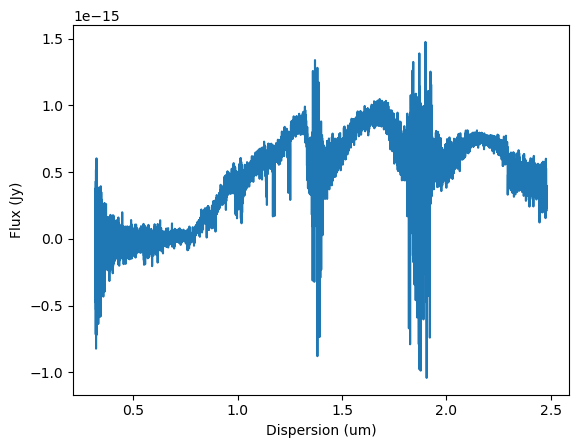

WARNING

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

: VerifyWarning: Card is too long, comment will be truncated. [astropy.io.fits.card]


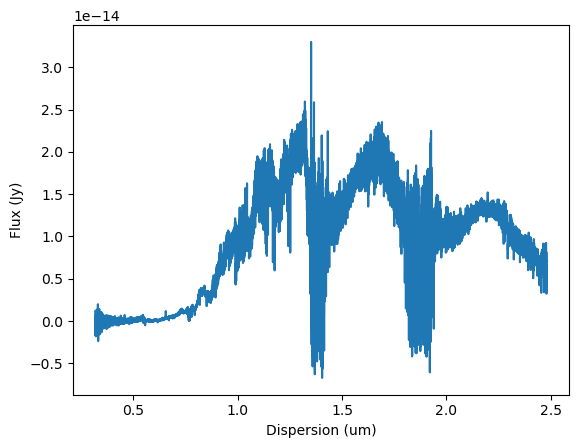

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

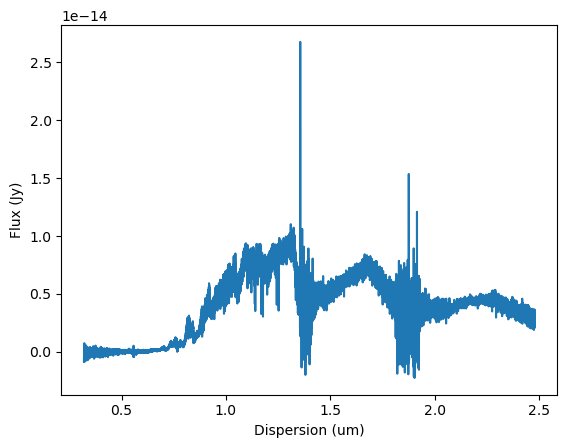

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

Date of observation: Oct 10, 2019
DATE-OBS set to : 2019-10-10.
The following keywords are not set in the header:
TMID : [d] MJD of exposure mid-point
TELAPSE : [s] Total elapsed time (s)
APERTURE : [arcsec] slit width
coordinates converted to sexagesimal: 01h03m32.04s +19d35m36.1788s
SIMBAD results for object name 2MASSI J0103320+193536:        main_id                 ra         ...       matched_id      
                              deg         ...                       
---------------------- ------------------ ... ----------------------
2MASSI J0103320+193536 15.883488000000002 ... 2MASSI J0103320+193536
coordinates converted to sexagesimal: 01h03m32.04s +19d35m36.1788s
Object name 2MASSI J0103320+193536 found in SIMBAD
       main_id                 ra         ...       matched_id      
                              deg         ...                       
---------------------- ------------------ ... ----------------------
2MASSI J0103320+193536 15.883488000000002 ... 2MASSI J0103

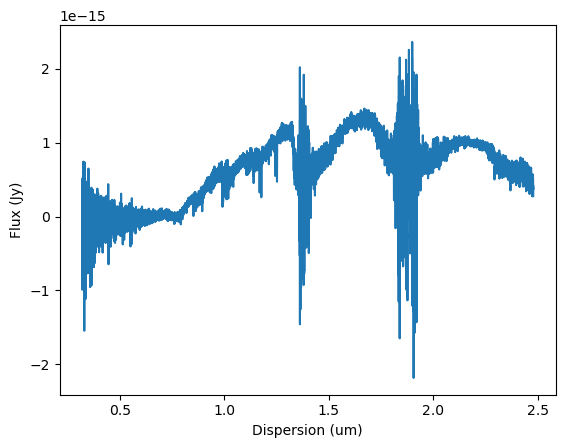

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

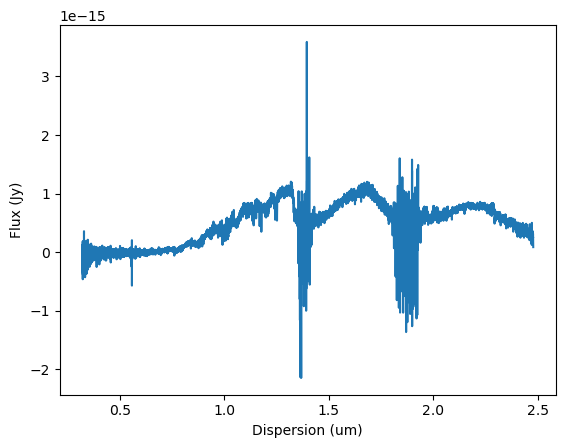

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

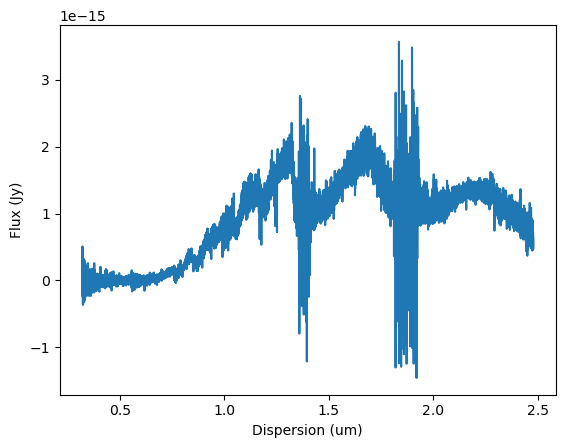

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

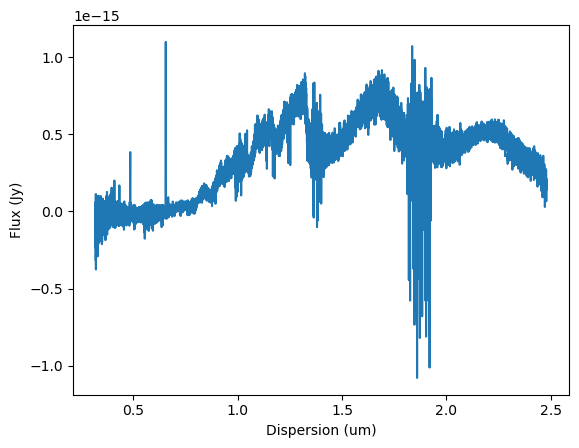

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

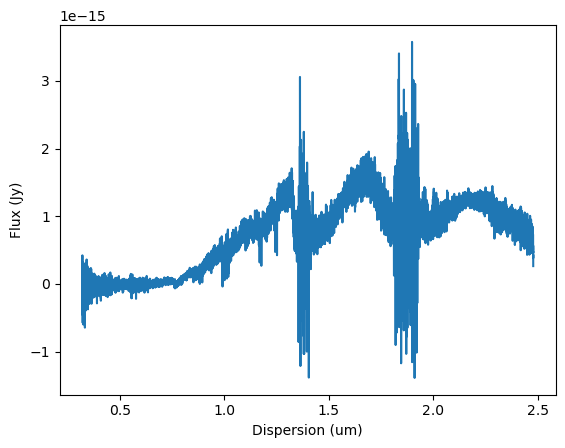

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

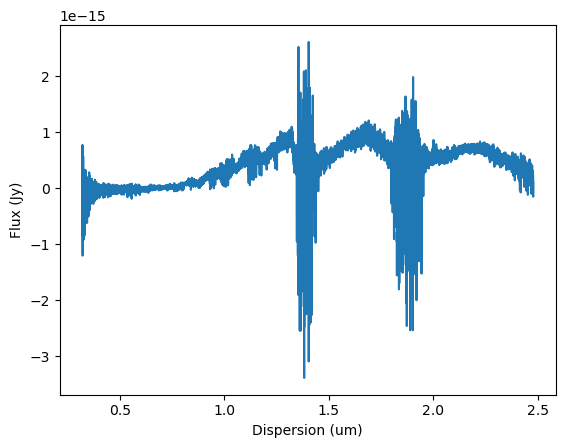

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

Date of observation: Sep 10, 2019
DATE-OBS set to : 2019-09-10.
The following keywords are not set in the header:
TMID : [d] MJD of exposure mid-point
TELAPSE : [s] Total elapsed time (s)
APERTURE : [arcsec] slit width
coordinates converted to sexagesimal: 03h55m23.376s +11d33m43.8012s
SIMBAD results for object name 2MASS J03552337+1133437:         main_id                 ra        ...        matched_id      
                               deg        ...                        
----------------------- ----------------- ... -----------------------
2MASS J03552337+1133437 58.84738996283751 ... 2MASS J03552337+1133437
coordinates converted to sexagesimal: 03h55m23.376s +11d33m43.8012s
Object name 2MASS J03552337+1133437 found in SIMBAD
        main_id                 ra        ...        matched_id      
                               deg        ...                        
----------------------- ----------------- ... -----------------------
2MASS J03552337+1133437 58.84738996283751 ... 2

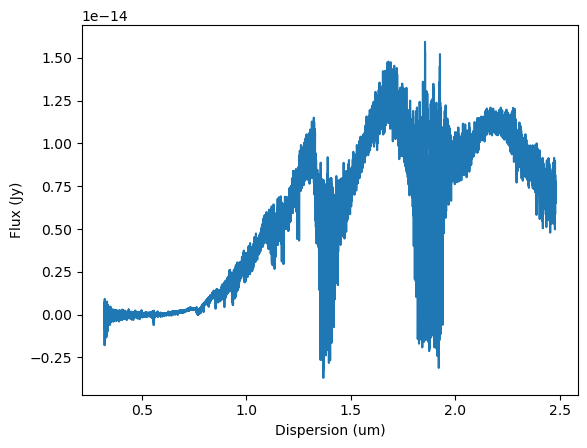

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

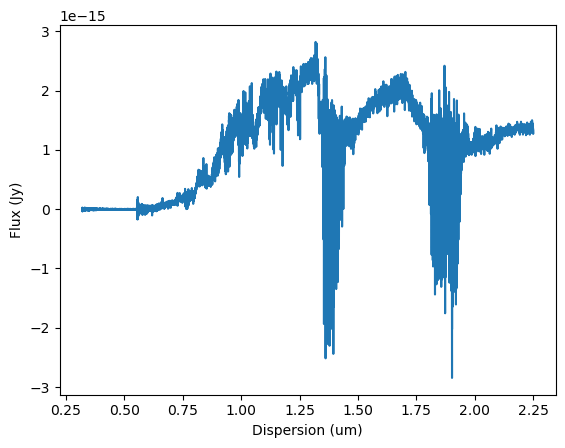

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

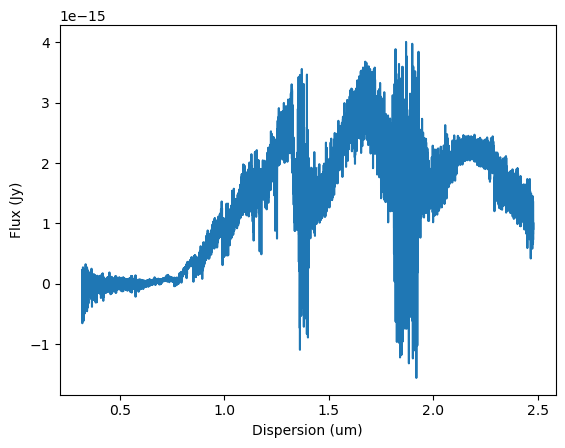

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

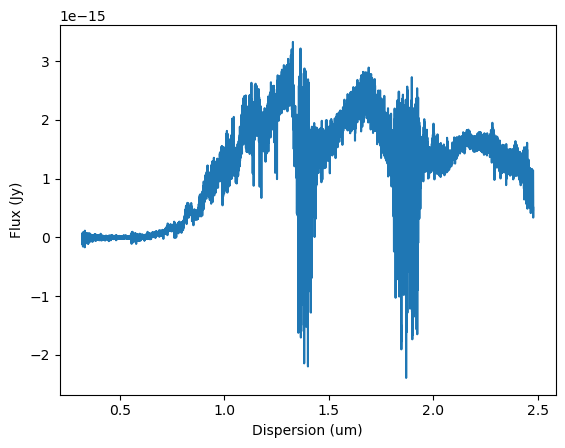

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

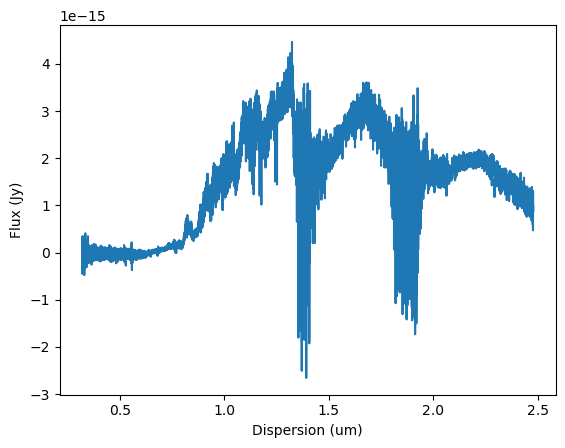

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

Date of observation: Feb 06, 2020
DATE-OBS set to : 2020-02-06.
The following keywords are not set in the header:
TMID : [d] MJD of exposure mid-point
TELAPSE : [s] Total elapsed time (s)
APERTURE : [arcsec] slit width
coordinates converted to sexagesimal: 07h23m52.656s -33d09m44.5392s
SIMBAD results for object name 2MASS J07235265-3309446:         main_id                 ra         ...        matched_id      
                               deg         ...                        
----------------------- ------------------ ... -----------------------
2MASS J07235265-3309446 110.96941187555001 ... 2MASS J07235265-3309446
coordinates converted to sexagesimal: 07h23m52.656s -33d09m44.5392s
Object name 2MASS J07235265-3309446 found in SIMBAD
        main_id                 ra         ...        matched_id      
                               deg         ...                        
----------------------- ------------------ ... -----------------------
2MASS J07235265-3309446 110.969411875550

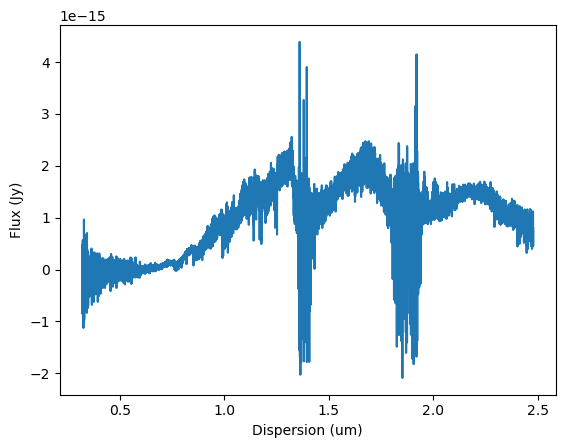

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

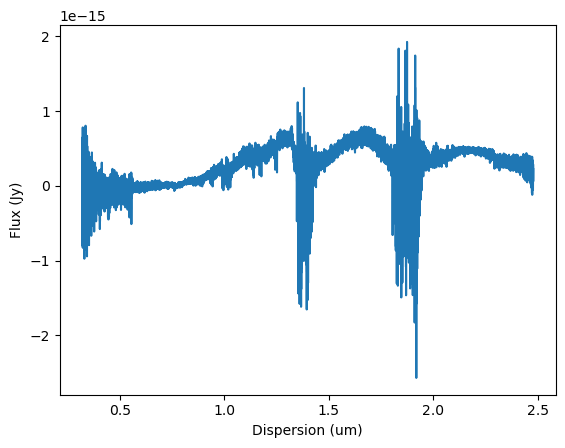

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

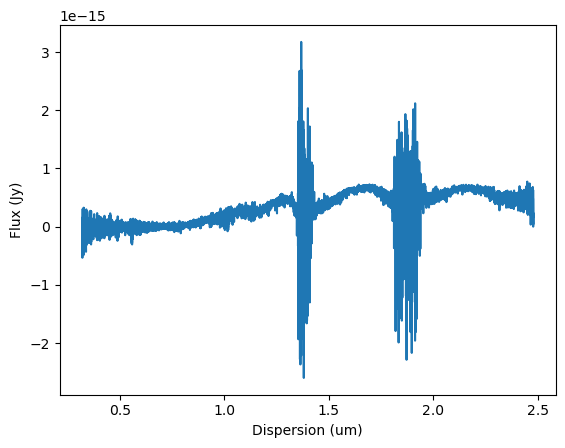

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

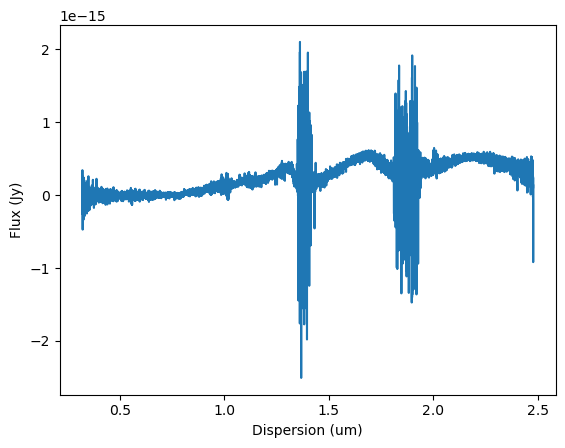

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

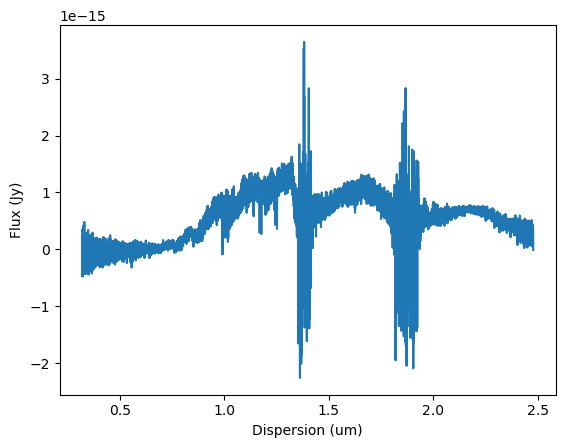

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

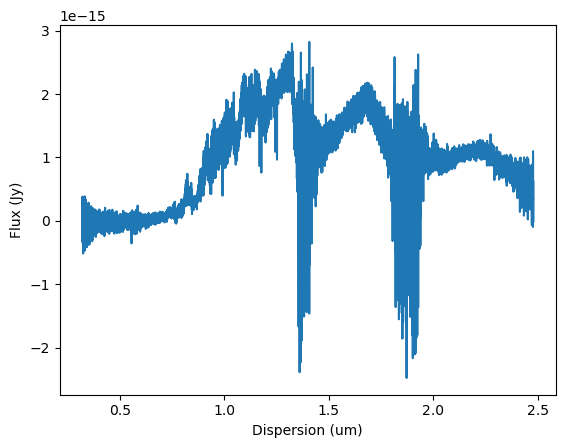

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

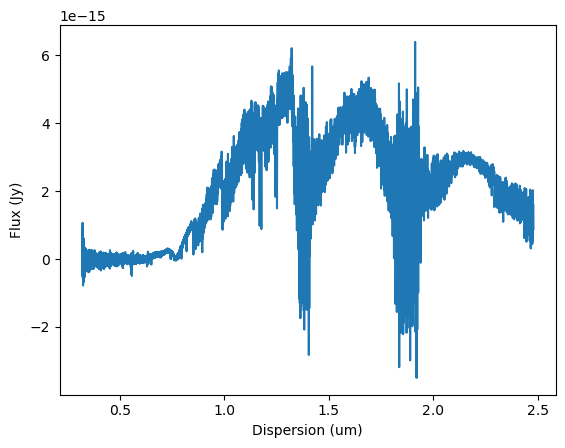

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

Date of observation: Jun 19, 2018
DATE-OBS set to : 2018-06-19.
The following keywords are not set in the header:
TMID : [d] MJD of exposure mid-point
TELAPSE : [s] Total elapsed time (s)
APERTURE : [arcsec] slit width
coordinates converted to sexagesimal: 14h25m27.984s -36d50m23.2512s
SIMBAD results for object name 2MASS J14252798-3650229:         main_id                 ra        ...        matched_id      
                               deg        ...                        
----------------------- ----------------- ... -----------------------
2MASS J14252798-3650229 216.3666022267737 ... 2MASS J14252798-3650229
coordinates converted to sexagesimal: 14h25m27.984s -36d50m23.2512s
Object name 2MASS J14252798-3650229 found in SIMBAD
        main_id                 ra        ...        matched_id      
                               deg        ...                        
----------------------- ----------------- ... -----------------------
2MASS J14252798-3650229 216.3666022267737 ... 2

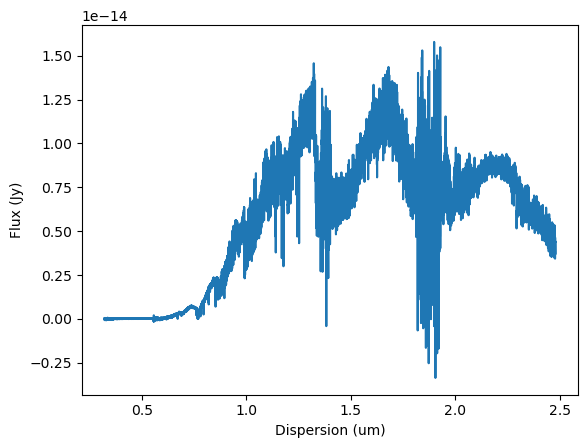

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

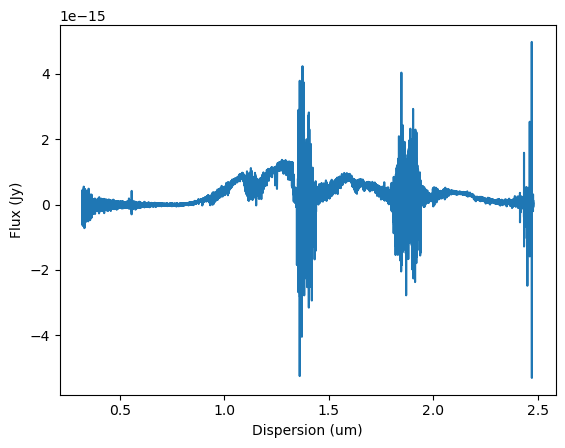

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

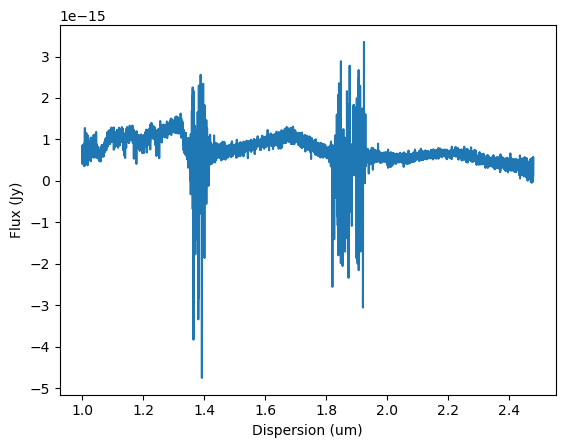

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

Date of observation: May 03, 2019
DATE-OBS set to : 2019-05-03.
The following keywords are not set in the header:
TMID : [d] MJD of exposure mid-point
TELAPSE : [s] Total elapsed time (s)
APERTURE : [arcsec] slit width
coordinates converted to sexagesimal: 21h04m31.296s -09d39m21.8196s
SIMBAD results for object name 2MASS J21043128-0939217:         main_id                ra       ...        matched_id      
                              deg       ...                        
----------------------- --------------- ... -----------------------
2MASS J21043128-0939217 316.13039453158 ... 2MASS J21043128-0939217
coordinates converted to sexagesimal: 21h04m31.296s -09d39m21.8196s
Object name 2MASS J21043128-0939217 found in SIMBAD
        main_id                ra       ...        matched_id      
                              deg       ...                        
----------------------- --------------- ... -----------------------
2MASS J21043128-0939217 316.13039453158 ... 2MASS J21043128-0

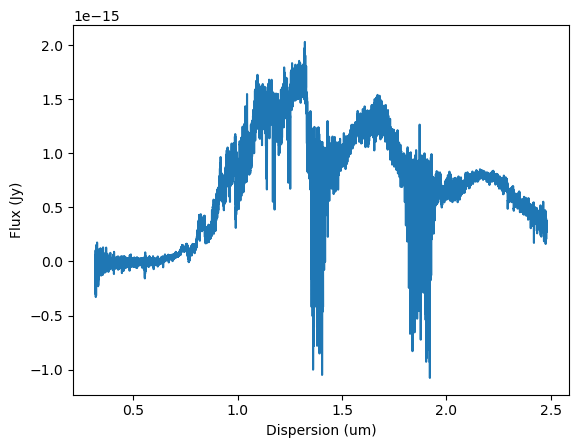

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

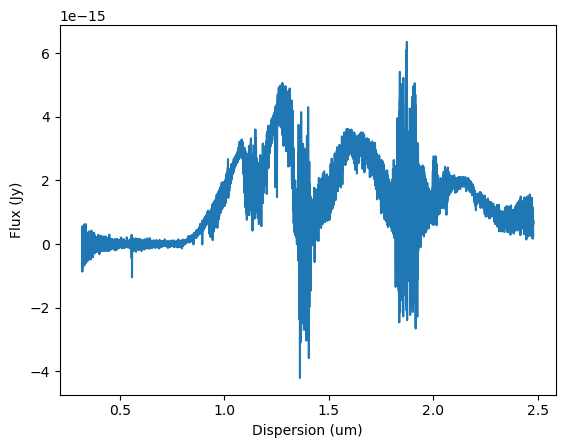

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

Date of observation: Jun 01, 2018
DATE-OBS set to : 2018-06-01.
The following keywords are not set in the header:
TMID : [d] MJD of exposure mid-point
TELAPSE : [s] Total elapsed time (s)
APERTURE : [arcsec] slit width
coordinates converted to sexagesimal: 22h06m45s -42d17m21.1416s
SIMBAD results for object name 2MASSW J2206450-421721:        main_id                ra       ...       matched_id      
                             deg       ...                       
---------------------- --------------- ... ----------------------
2MASSW J2206450-421721 331.68750397115 ... 2MASSW J2206450-421721
coordinates converted to sexagesimal: 22h06m45s -42d17m21.1416s
Object name 2MASSW J2206450-421721 found in SIMBAD
       main_id                ra       ...       matched_id      
                             deg       ...                       
---------------------- --------------- ... ----------------------
2MASSW J2206450-421721 331.68750397115 ... 2MASSW J2206450-421721
make sure SIMBAD co

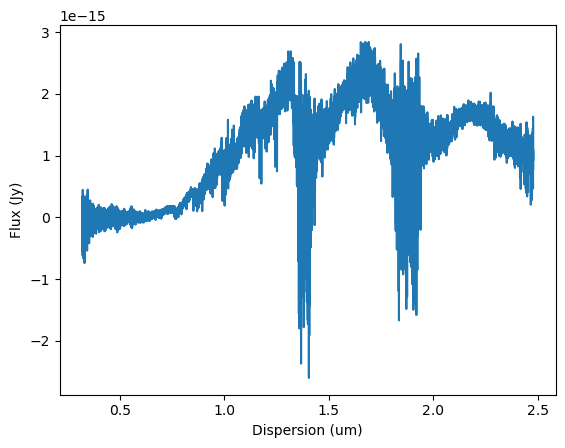

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

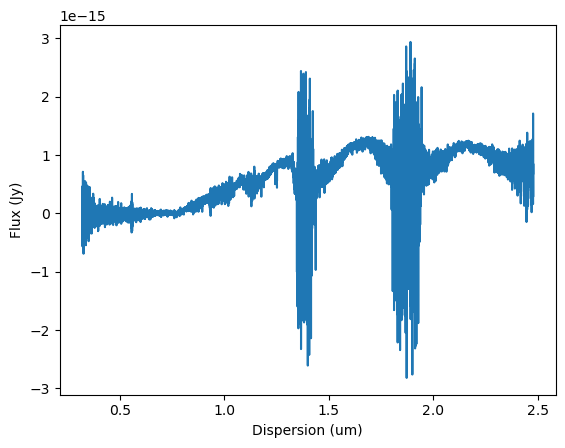

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

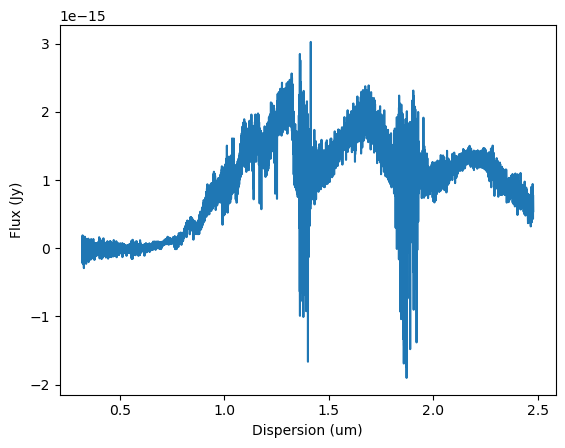

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

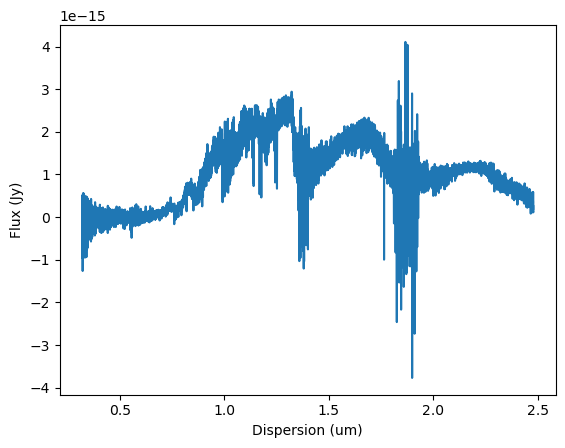

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

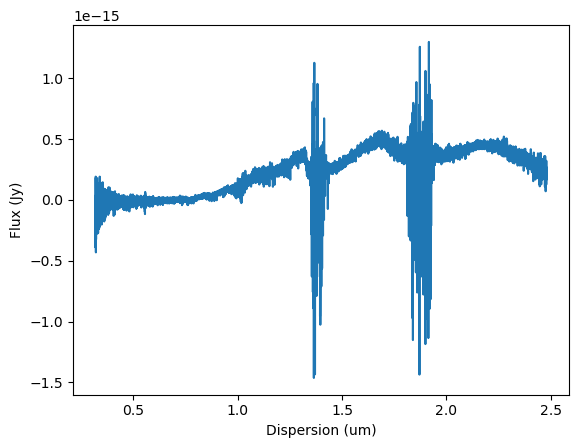

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

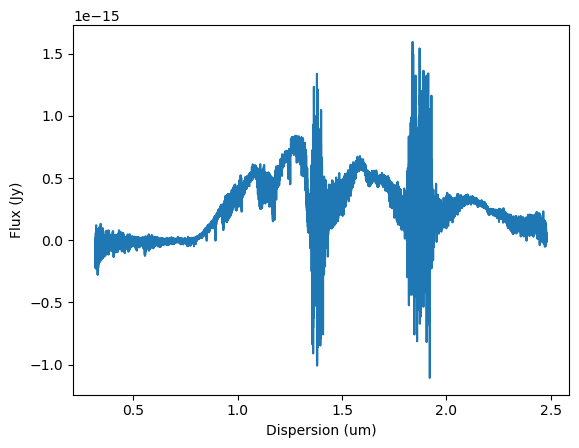

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

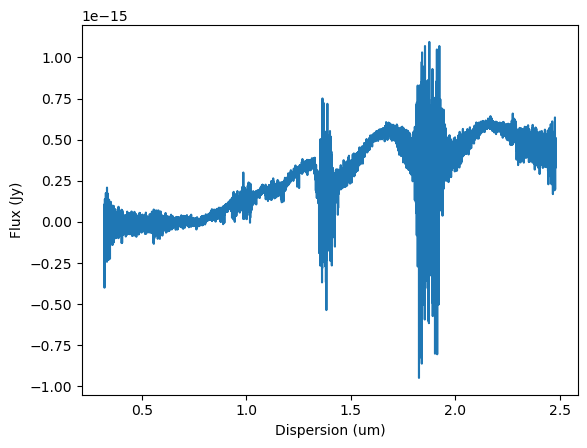

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

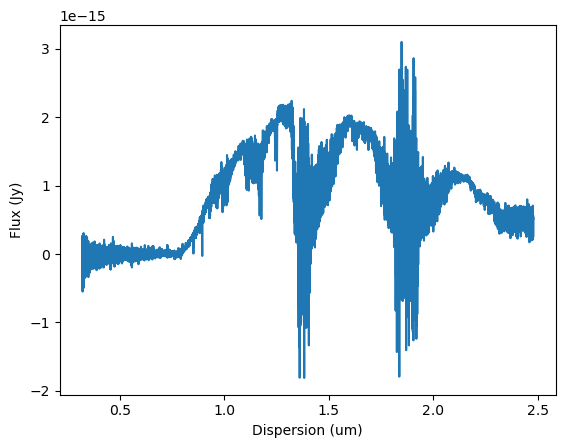

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

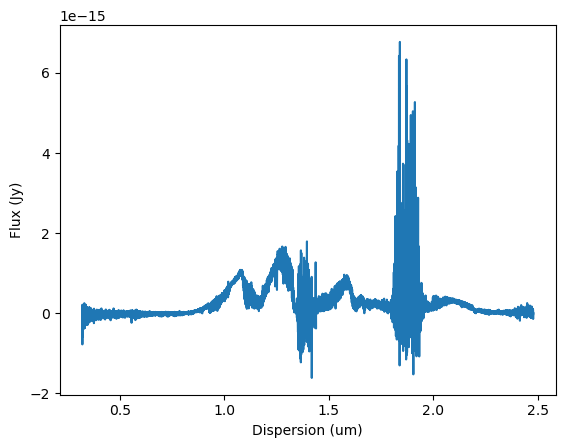

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

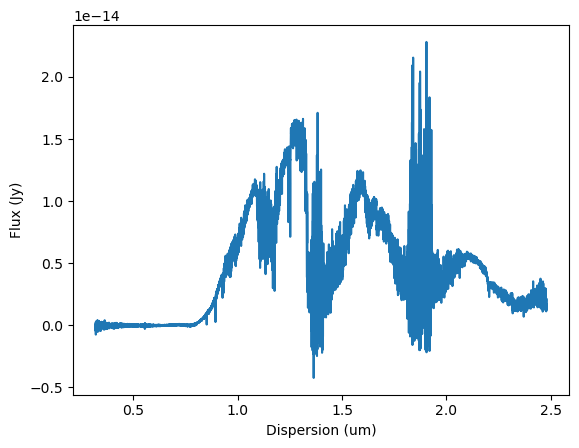

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

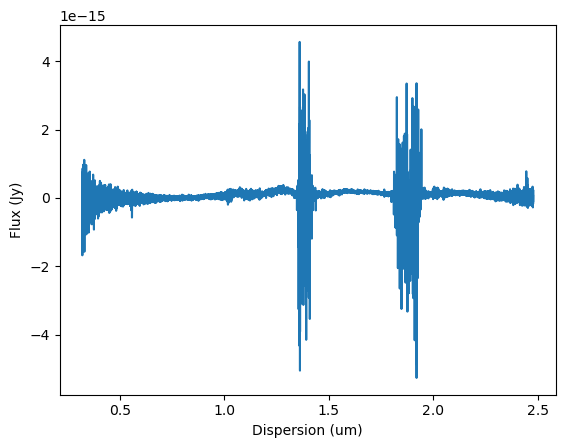

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

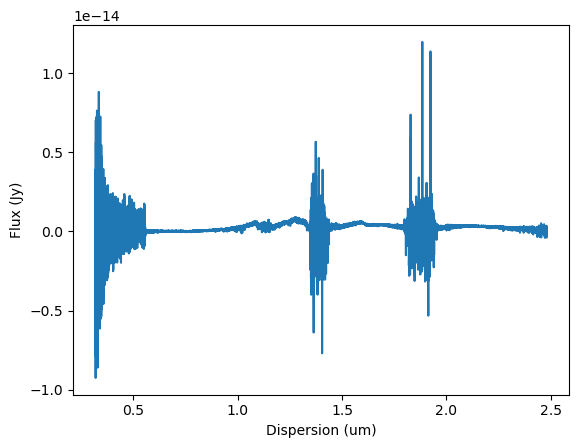

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

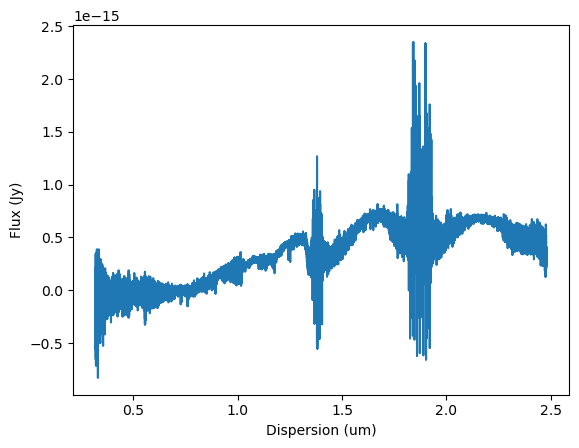

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

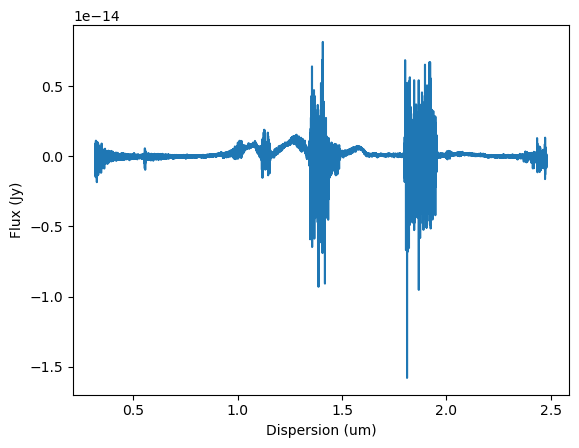

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

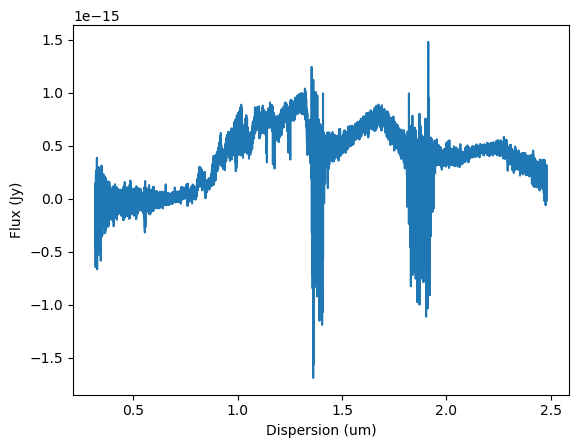

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

Date of observation: Dec 16, 2022
DATE-OBS set to : 2022-12-16.
The following keywords are not set in the header:
TMID : [d] MJD of exposure mid-point
TELAPSE : [s] Total elapsed time (s)
APERTURE : [arcsec] slit width
coordinates converted to sexagesimal: 08h19m58.2s -03d35m26.6496s
SIMBAD results for object name 2MASS J08195820-0335266:         main_id             ra     ...        matched_id      
                           deg     ...                        
----------------------- ---------- ... -----------------------
2MASS J08195820-0335266 124.992527 ... 2MASS J08195820-0335266
coordinates converted to sexagesimal: 08h19m58.2s -03d35m26.6496s
Object name 2MASS J08195820-0335266 found in SIMBAD
        main_id             ra     ...        matched_id      
                           deg     ...                        
----------------------- ---------- ... -----------------------
2MASS J08195820-0335266 124.992527 ... 2MASS J08195820-0335266
make sure SIMBAD coords match header 

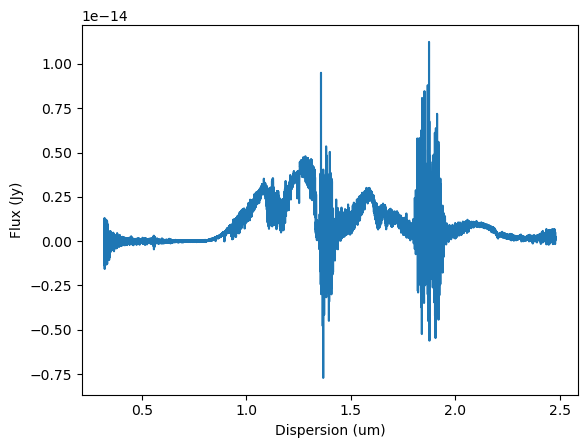

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBJECT', "<value>")
header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('INSTRUME', "<value>")
header.set('TELESCOP', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOPUB', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('CONTRIB1', "<value>")
header.set('DATE-OBS', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPEC_VAL', "<value>")
header.set('SPEC_BW', "<value>")
header.set('TDMIN1', "<value>"

Date of observation: Jun 05, 2019
DATE-OBS set to : 2019-06-05.
The following keywords are not set in the header:
TMID : [d] MJD of exposure mid-point
TELAPSE : [s] Total elapsed time (s)
APERTURE : [arcsec] slit width
coordinates converted to sexagesimal: 22h16m28.632s +19d52m48.1008s
SIMBAD results for object name PSO J334.1193+19.8800:        main_id            ra    ...     coo_bibcode           matched_id     
                         deg    ...                                          
--------------------- --------- ... ------------------- ---------------------
PSO J334.1193+19.8800 334.11925 ... 2015ApJ...814..118B PSO J334.1193+19.8800
coordinates converted to sexagesimal: 22h16m28.632s +19d52m48.1008s
Object name PSO J334.1193+19.8800 found in SIMBAD
       main_id            ra    ...     coo_bibcode           matched_id     
                         deg    ...                                          
--------------------- --------- ... ------------------- -----------------

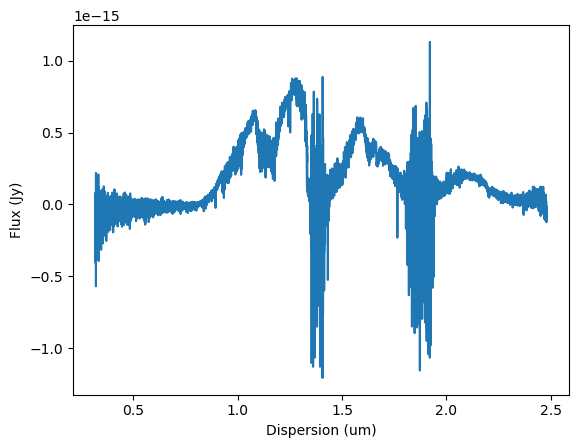

In [79]:
for row in xshyne_table:
    #create new header
    header = add_missing_keywords()

    source = row['Source']
    short_name = row['Short Name']
    date = row['Date']
    ra = row['Ra']
    dec = row['Dec']
    
    #read the file
    load = load_file(short_name)
    wave = load[0]
    flux = load[1]
    err = load[2]
    print(wave, flux, err)

    add_wavelength()
    add_observation_date(header, date)

    add_keywords(source = source, ra = ra, dec = dec, observ = date)

    if short_name == '2MASS0030': 
        check_header(header=header, ignore_simbad = True)
    else:
        check_header(header)

    create_fits_file(wave = wave, flux = flux, err = err, header = header, source = short_name)
    fits_created+=1

In [80]:
print(f"Fits file created: {fits_created}")

Fits file created: 43
